**Computer Vision: Saliency Map for CIFAR Dataset** <br>
Interpret the deep learning model result by looking on its gradients.

In [ ]:
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt

from torch.autograd import Variable


from torchvision import datasets
from torchvision import transforms

# Functional module contains helper functions
import torch.nn.functional as F

**Set up the deep learning model**

In [68]:
net = torch.hub.load('pytorch/vision:v0.6.0', 'alexnet', pretrained=True)

#Updating the second classifier
net.classifier[4] = nn.Linear(4096,1024)

#Updating the third and the last classifier that is the output layer of the network. Make sure to have 10 output nodes if we are going to get 10 class labels through our model.
net.classifier[6] = nn.Linear(1024,10)

net.load_state_dict(torch.load("./2.model.path"))

Using cache found in C:\Users\merna/.cache\torch\hub\pytorch_vision_v0.6.0


<All keys matched successfully>

**Open the Image and preprocess**

In [69]:
from PIL import Image

import torch
import torch.nn as nn
import matplotlib.pyplot as plt

from torch.autograd import Variable

# Torchvision module contains various utilities, classes, models and datasets 
# used towards computer vision usecases
from torchvision import datasets
from torchvision import transforms

# Functional module contains helper functions
import torch.nn.functional as F

transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

dataiter = iter(testloader)
images, labels = dataiter.next()

ind = 3

X = images[ind].unsqueeze(0)

Files already downloaded and verified
Files already downloaded and verified


**Retrieve the gradient**

In [70]:
net.eval()

# Set the requires_grad_ to the image for retrieving gradients
X.requires_grad_()


saliency = None

# Retrieve output from the image
output = net(X)


# Catch the output
output_idx = output.argmax()
output_max = output[0, output_idx]

# Do backpropagation to get the derivative 
# of the output based on the image
output_max.backward()

**Visualize the Result**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


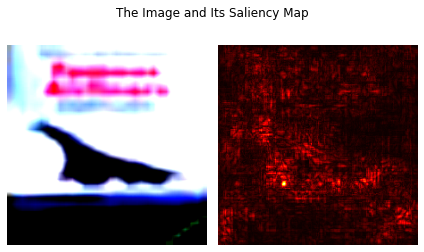

In [71]:
import torch
import torch.nn as nn
# Retireve the saliency map and also pick the maximum value from channels on each pixel.
# In this case, we look at dim=1. Recall the shape (batch_size, channel, width, height)
saliency, _ = torch.max(X.grad.data.abs(), dim=1) 
saliency = saliency.reshape(224, 224)

X = X.reshape(-1, 224, 224)

# Visualize the image and the saliency map
fig, ax = plt.subplots(1, 2)
ax[0].imshow(X.detach().numpy().transpose(1, 2, 0))
ax[0].axis('off')
ax[1].imshow(saliency, cmap='hot')
ax[1].axis('off')
plt.tight_layout()
fig.suptitle('The Image and Its Saliency Map')
plt.show()

Interesting resources on Saliency Maps Security- <br>
https://kennysong.github.io/adversarial.js/cifar_targeted.html

As you can see from the image above, the left side is the image, and the right size is the saliency map. Recall from its definition the saliency map will show the strength for each pixel contribution to the final output.

**Saliency Map:** <br>

Reference - 
Helpful Link: <br>
https://arxiv.org/abs/1312.6034

**Concept summaries regarding model interpretation-** <br>
Vanilla Gradient (Saliency Map) <br>
DeconvNet <br>
Grad-CAM <br>
SmoothGrad <br>